## Modeling
#### Nesta fase os dados foram preparados para integração em modelos de machine learning na fase de Modeling
#### As séries temporais "male", "female", "young" e "adult" foram retiradas dos dados uma vez que o nosso objetivo é orientado para a série "all"
#### A coluna "date" também foi removida porque apenas serve para nos situarmos no tempo, para a divisão dos dados em antigos=treino, recentes=teste. Além disso a sua natureza única (única por observação) apenas iria trazer incerteza para os modelos.
#### Para lidar com os valores outliers foram criados 2 cenários:
<ul>
    <li><b>Com outliers</b> - Neste cenário os valores outliers não foram tratados</li>
    <li><b>Sem outliers s/ compensação</b> - Neste cenário os valores outliers foram tratados</li>

</ul>

#### Por fim os dados de cada cenário foram exportados para os respetivos ficheiros csv para poderem ser utilizados nas fases seguintes 

In [1]:
# Importar Libraries
library(tidyverse)
library(rminer)
library(forecast)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'rminer' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [3]:
# Importar os dados
data <- read.csv(file = './exported data/dadosPrep.csv')

# Retirar a coluna X (Index)
data = data %>% select(-X)
head(data)

all,weather,maxtemp,RH,maxwind
2332,0,13,87,0
2801,0,14,94,45
2375,0,14,82,55
3447,1,13,78,0
4823,0,16,81,37
4978,0,16,73,0


## Rminer

### Spliting the dataset

In [4]:
# Separação dos índices do dataframe ordenada cronologicamente (porque os dados já estão em ordem cronológica), usando 250
# observações para treino e 7 para teste
H=holdout(data$all,ratio=7,mode="order")
H

# Seleção dos dados de Treino
train = data[H$tr,]
cat("Dados de treino:\n")
cat("Head: ", head(train$all),"\n")
cat("Length: ", length(train$all),"\n\n")

# Seleção dos dados de Teste
test = data[H$ts,]
cat("Dados de teste:\n")
cat("Head: ", head(test$all),"\n")
cat("Length: ", length(test$all))

$tr
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
[235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250

$itr
NULL

$val
NULL

$ts
[1] 251 252 253 254 255 256 257

Dados de treino:
Head:  2332 2801 2375 3447 4823 4978 
Length:  250 

Dados de teste:
Head:  4974 3228 3191 4153 4307 4660 
Length:  7

### Modelos de Regressão (ML)

#### Random Forest

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3764.005 3833.647 3695.257 3748.338 3259.948 4058.153 3768.615 
MAE: 971.12 
NMAE: 32.35 


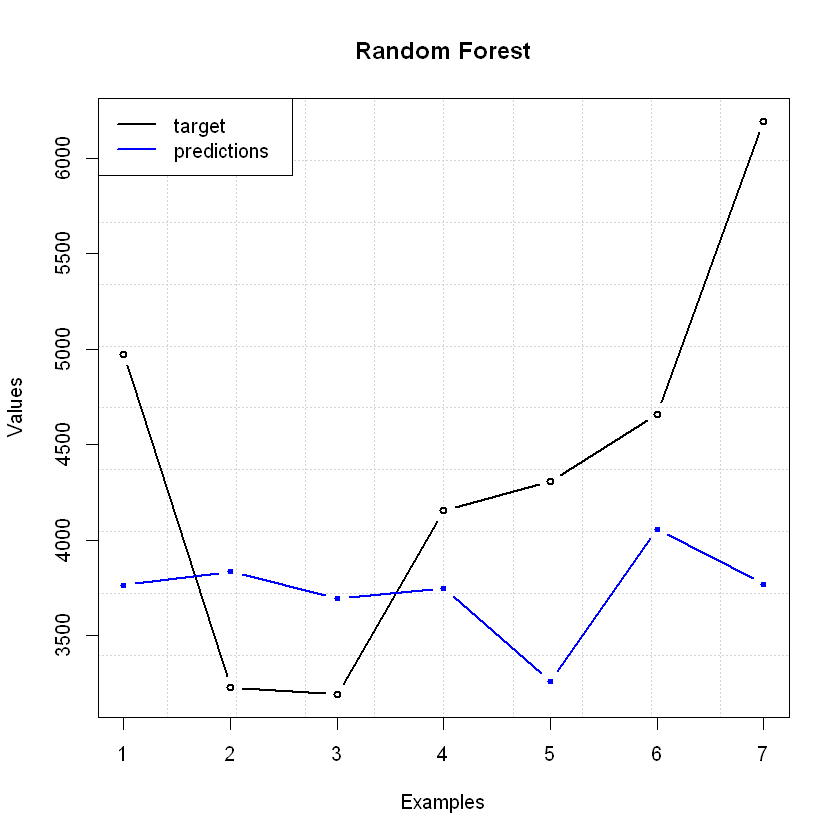

In [118]:
RF=fit(all~.,train,model="randomForest")
Target = test$all
cat("Target Values:",Target,"\n")

Pred = predict(RF,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="Random Forest")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### Multiple Linear Regression

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3187.233 3168.647 2932.272 3042.532 2638.799 3109.731 3099.146 
MAE: 1361.09 
NMAE: 45.34 


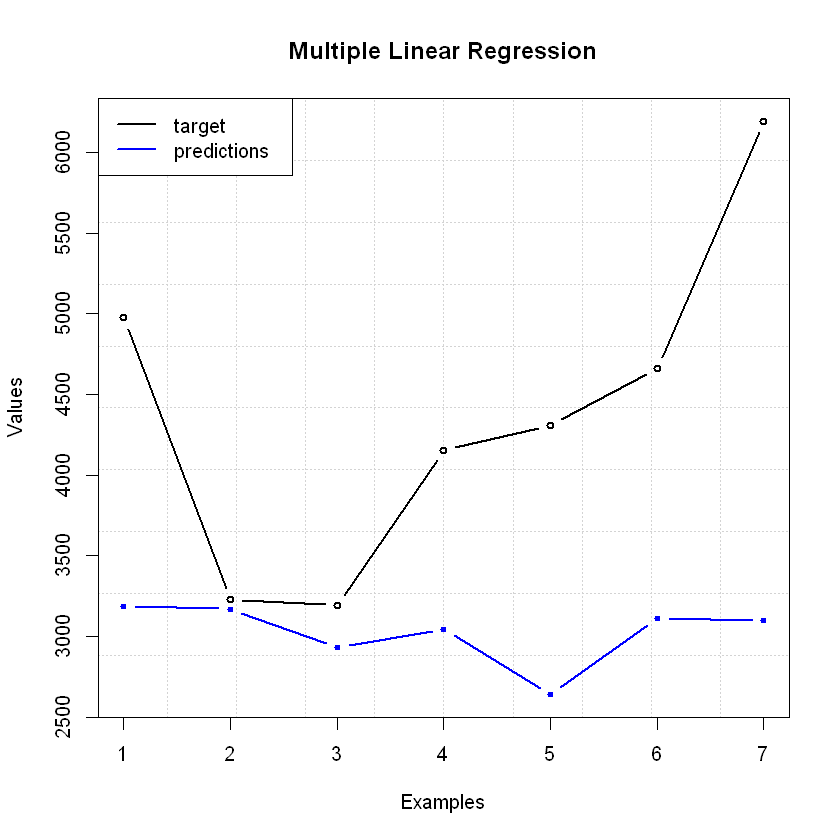

In [119]:
MR=fit(all~.,train,model="mr")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="Multiple Linear Regression")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### KSVM

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3722.704 4228.571 3186.75 3328.989 2643.094 3847.016 3775.707 
MAE: 1139.19 
NMAE: 37.95 


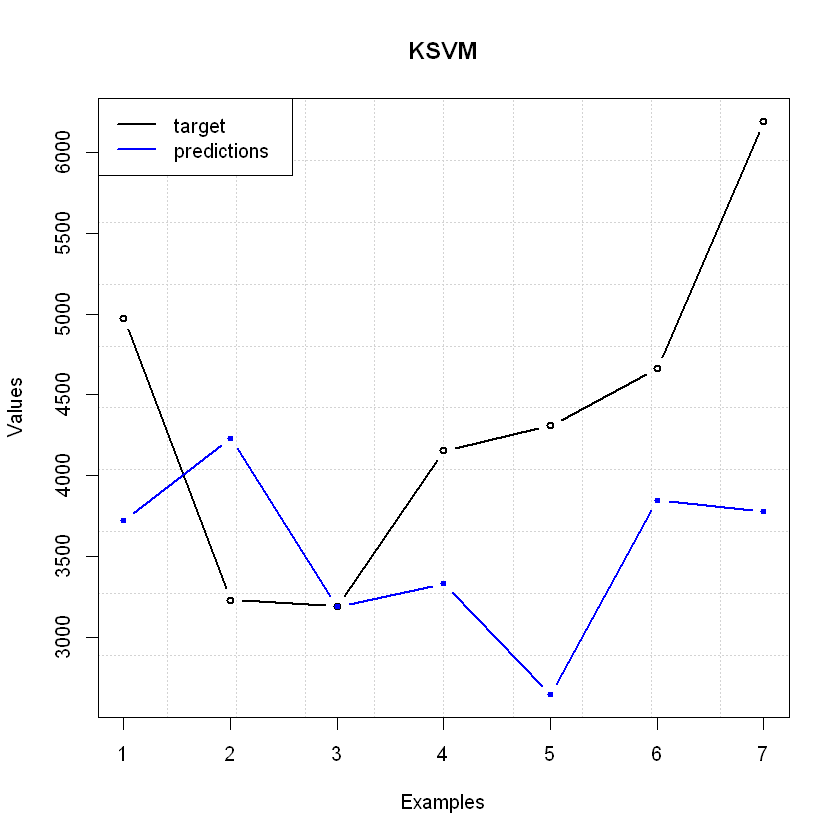

In [120]:
MR=fit(all~.,train,model="ksvm")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="KSVM")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### MLPE

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3566.065 3648.961 3393.688 3499.245 3587.181 3799.319 3790.773 
MAE: 952.58 
NMAE: 31.73 


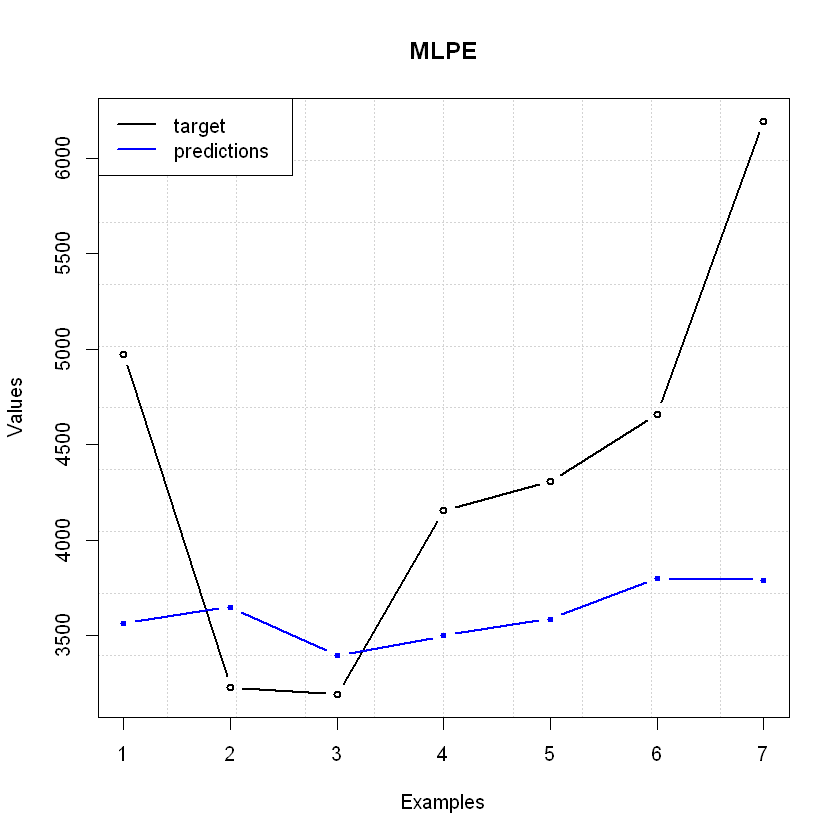

In [126]:
MR=fit(all~.,train,model="mlpe")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="MLPE")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

### Time Series Forecast

2332 2801 2375 3447 4823 4978 2706 2639 2647 2612 3530 4440 3469 2542 2779 4488 5506 2954 2542 2892 2445 2231 3617 2113 2363 3728 3643 2249 2214 1668 1121 2160 2107 2281 1301 1628 1344 1417 1616 2112 2210 1402 1504 2262 2146 2564 3318 3514 2258 2341 2186 1794 2643 4308 3593 2025 1746 3256 3579 4101 4917 4490 3109 1869 1625 2685 3100 2418.75 1738 1056.25 375 1689 2569 2722 3290 3494 2822 3620 3512 2643 4783 5136 4911 4054 3963 3709 3847 4448 5963 4818 4028 4381 3926 4063 5069 5762 4816 3576 3743 3679 3767 3718 4426 4602 3841 3815 4031 4914 4436 4898 5284 4027 4207 4172 4382 5723 7961 9371 4581 4337 4267 3801 3973 4292 3889 4269 4047 4330 9163 3895 3955 4345 4171 3612 3530 3604 3834 4429 3829 3964 8300 4981 3810 3918 4408 4394 3932 4039 3696 3754 3791 5224 5325 3822 3667 4114 3605 4085 5673 4394 3932 4039 3696 3754 3791 5224 5325 3822 3667 4114 3605 2135 3954 4712 3232 2905 2668 8270 3047 4439 15735 4205 1638 2564 2371 2207 4647 3866 1877 1754 1793 1617 4410 2607 2640 2289 1933 2866 3630

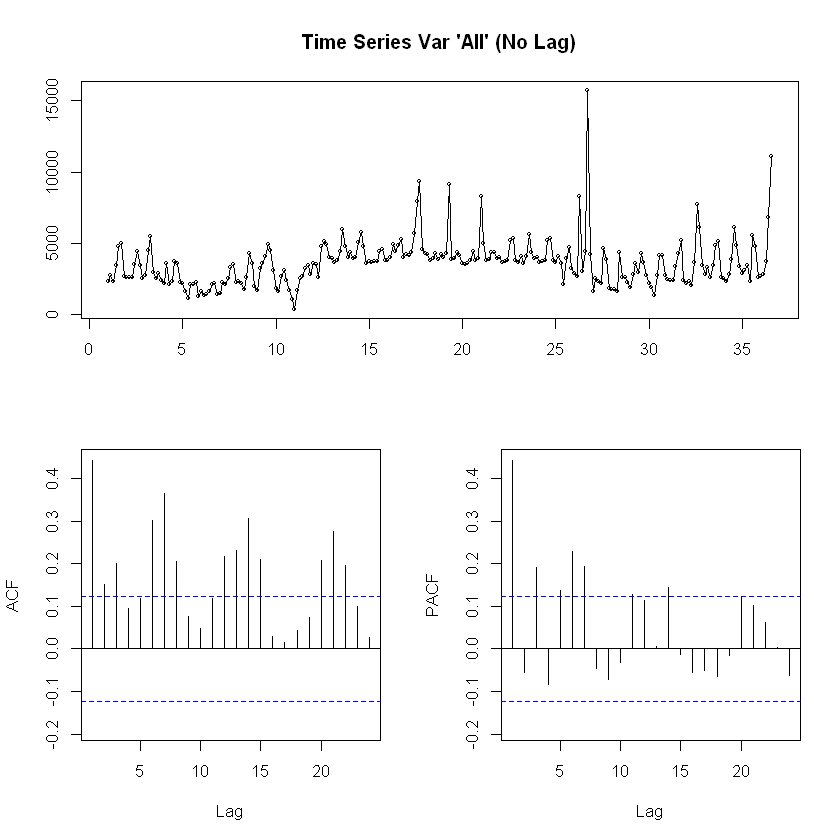

In [23]:
# Variáveis Globais
H = 7
TS = ts(train$all,frequency=H) # frequencia=7 porque é diário
Target = test$all

tsdisplay(TS, main="Time Series Var 'All' (No Lag)")

In [156]:
cat(diff(range(TS)))

15360

#### Holt Winters Method

SMAPE:  31.14 
MAE:  1541.28 
NMAE:  51.34 


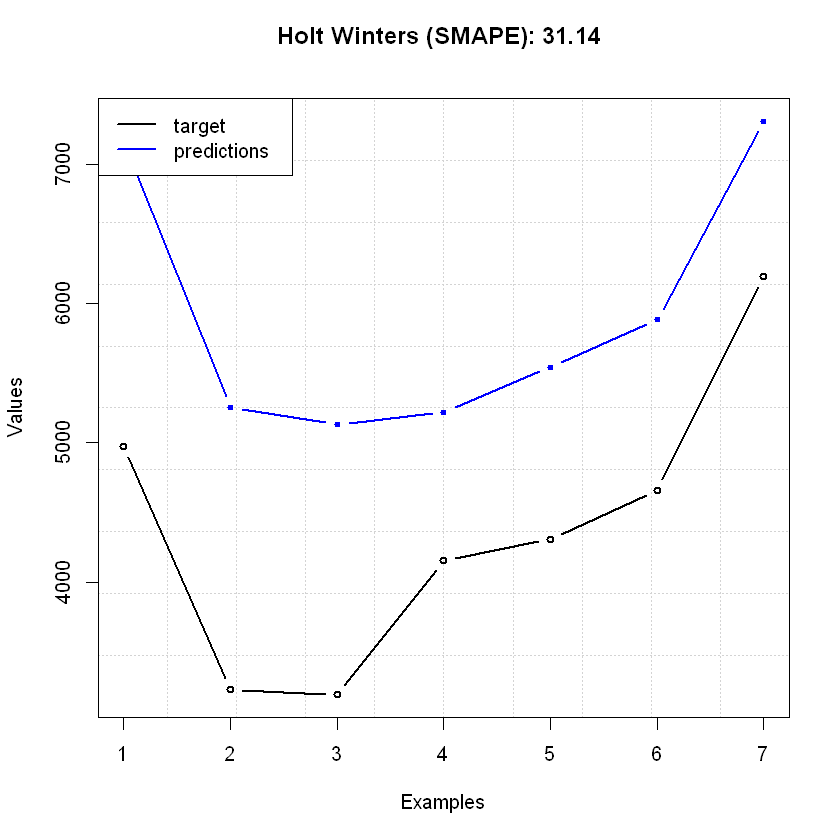

In [132]:
# Modelo
HW=HoltWinters(TS)
F=forecast(HW,h=H) # 1 to H ahead forecasts
Pred=F$mean[1:H] # HW predictions

# Gráfico
txt=paste("Holt Winters (SMAPE):",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main=txt)

cat("SMAPE: ",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

### ARIMA Method

SMAPE:  12.68 
MAE:  577.22 
NMAE:  19.23 


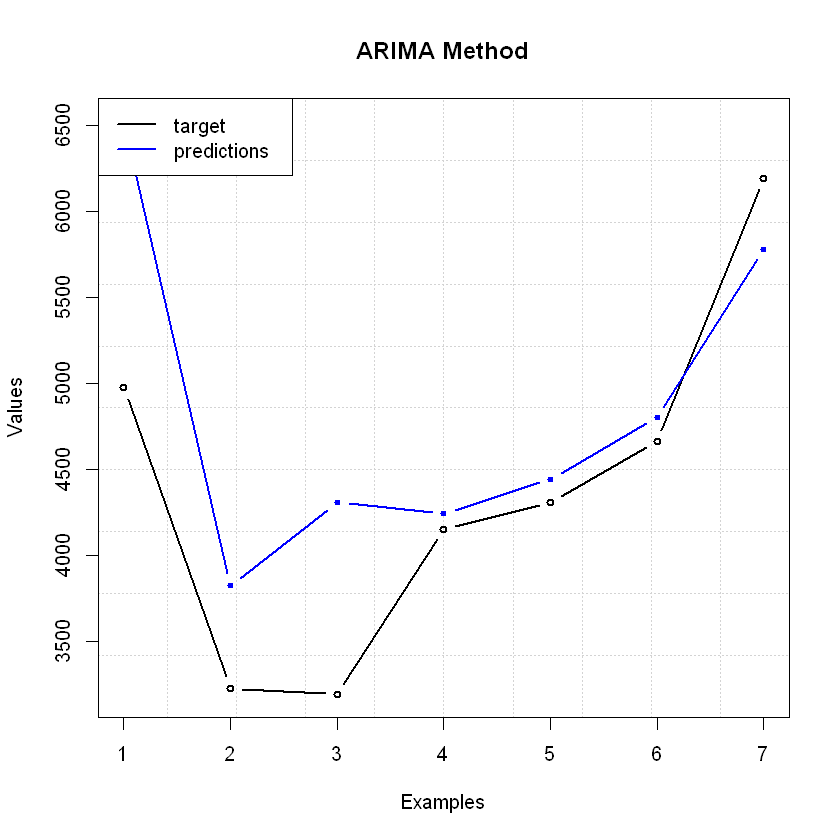

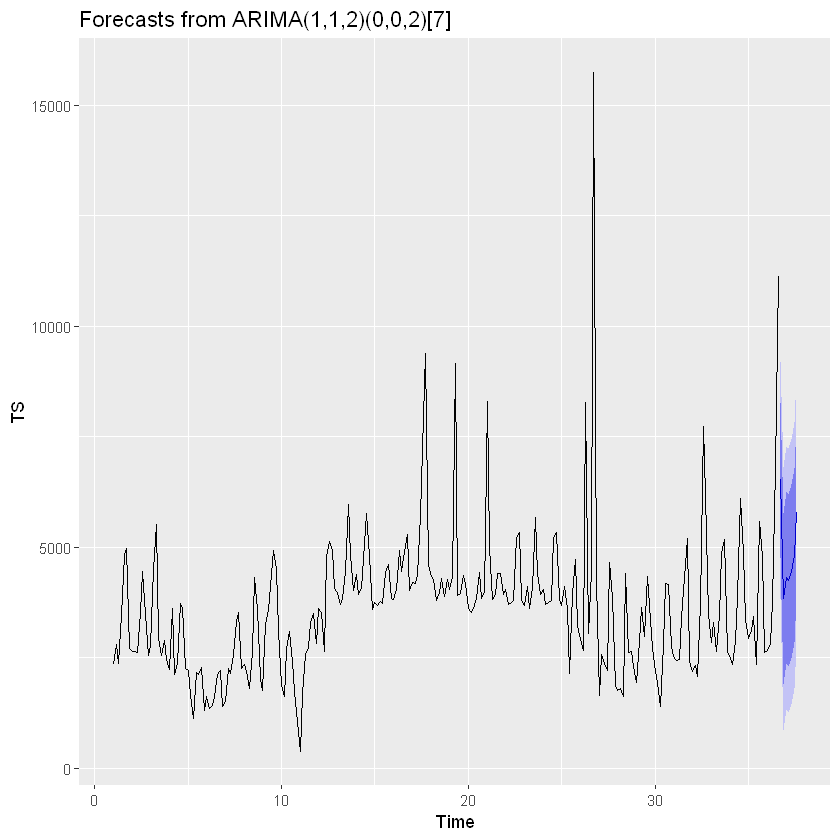

In [21]:
# Modelo
AR=auto.arima(TS)
F1=forecast(AR,h=H) # 1 to H ahead forecasts
Pred=F1$mean[1:H] # AR predictions

#Gráfico
txt=paste("ARIMA Method")
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main=txt)

cat("SMAPE: ",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

autoplot(F1)

### Neural Network Modeling

SMAPE:  14.57 
MAE:  641.3 
NMAE:  21.36 


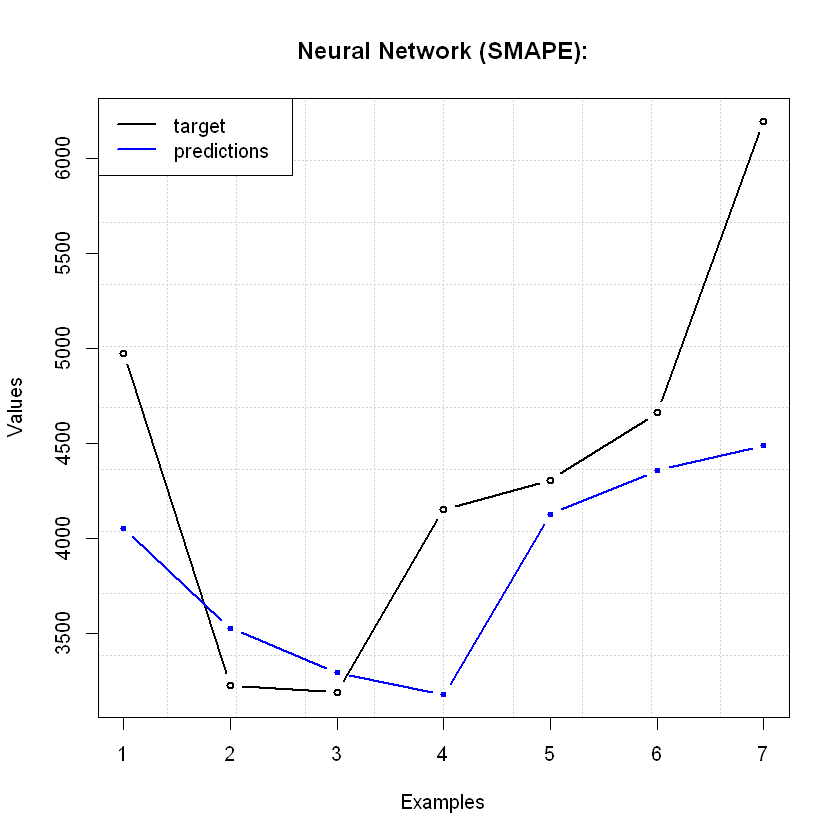

In [49]:
# neural network modeling:
d=CasesSeries(train$all,c(1,12,13)) # data.frame from time series
LD=nrow(d)
dtr=1:(LD-H) # train indices
NN=fit(y∼.,d[dtr,],model="mlpe")
# from 1 to H ahead forecasts:
Pred=lforecast(NN,d,start=(LD-H+1),horizon=H)

# Gráfico
txt=paste("Neural Network (SMAPE):")
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main=txt)

cat("SMAPE: ",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

In [13]:
cs = CasesSeries(data$all,c(1:7))

In [11]:
NN=rminer::fit(y~.,cs[1:243,],model="mlpe",search="heuristic")
PNN=predict(NN,cs[244:250,])
PNN

cat("MAE=",mmetric(cs[244:250,]$y,PNN,metric="MAE",val=srange),"\n")

[1] 5127.838 2990.907 3378.745 6604.357 4185.084 8496.710 4444.319

MAE= 1248.191 


In [17]:
cs[244:250,]$y

[1] 4974 3228 3191 4153 4307 4660 6193

In [8]:
NN=rminer::fit(all~.,train,model="mlpe",search="heuristic")
PNN=predict(NN,test)
PNN

cat("MAE=",mmetric(test$all,PNN,metric="MAE",val=srange),"\n")

[1] 3526.195 3526.195 3526.195 3526.195 2977.921 3526.195 3526.195

MAE= 1119.67 


In [ ]:
# Gráfico
txt=paste("Neural Network (SMAPE):")
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main=txt)

In [18]:
cs

lag7,lag6,lag5,lag4,lag3,lag2,lag1,y
2332,2801,2375,3447,4823,4978,2706,2639
2801,2375,3447,4823,4978,2706,2639,2647
2375,3447,4823,4978,2706,2639,2647,2612
3447,4823,4978,2706,2639,2647,2612,3530
4823,4978,2706,2639,2647,2612,3530,4440
4978,2706,2639,2647,2612,3530,4440,3469
2706,2639,2647,2612,3530,4440,3469,2542
2639,2647,2612,3530,4440,3469,2542,2779
2647,2612,3530,4440,3469,2542,2779,4488
2612,3530,4440,3469,2542,2779,4488,5506


SMAPE:  14.52 
MAE:  655.53 
NMAE:  21.84 


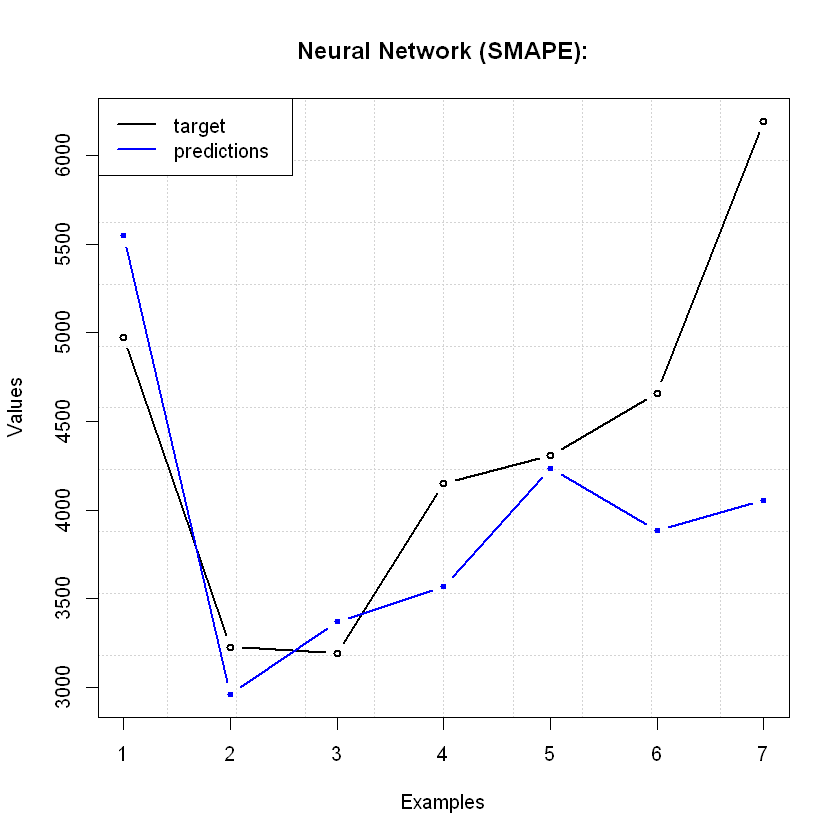

In [34]:
# neural network modeling:
# d=CasesSeries(train$all,c(1,12,13)) # data.frame from time series
LD=nrow(cs)
dtr=1:(LD-7) # train indices
NN=fit(y∼.,cs[dtr,],model="mlpe")
# from 1 to H ahead forecasts:
Pred=lforecast(NN,cs,start=(LD-7+1),horizon=7)
Target = cs[244:250,]$y

# Gráfico
txt=paste("Neural Network (SMAPE):")
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main=txt)

cat("SMAPE: ",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

In [32]:
cs[244:250,]$y

[1] 4974 3228 3191 4153 4307 4660 6193